In [14]:
# !wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
matplotlib.style.use('fivethirtyeight') 

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b7ddcf390>,
      dtype=object)

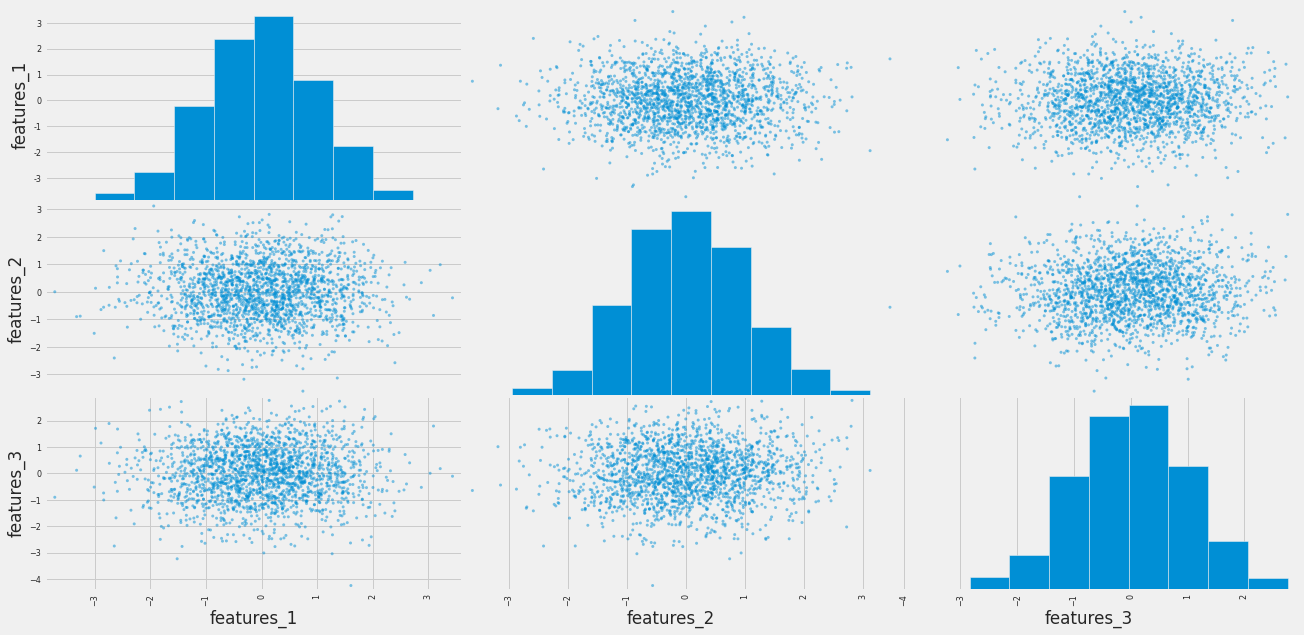

In [16]:
regression_data = pd.read_csv('/content/regression_generated.csv')
pd.plotting.scatter_matrix(regression_data[['features_1','features_2', 'features_3']], figsize = (20, 10))

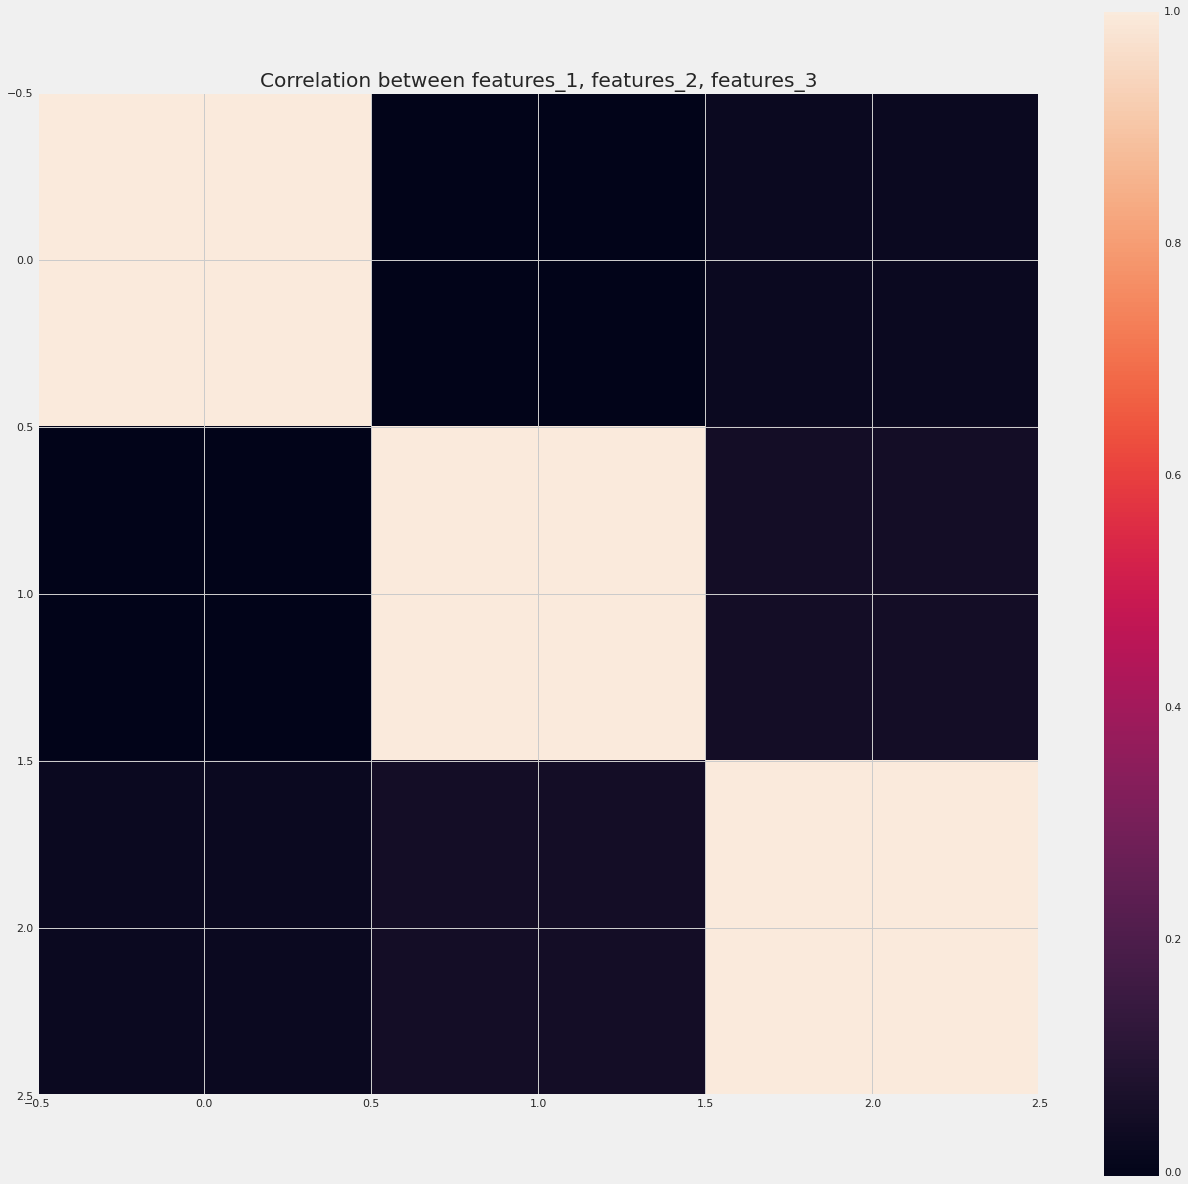

In [17]:
corr_df = regression_data[['features_1','features_2', 'features_3']].corr()

plt.figure(figsize = (20, 20))
plt.tight_layout()
plt.imshow(corr_df, interpolation='nearest')
plt.title('Correlation between features_1, features_2, features_3')
plt.colorbar()

In [18]:
corr_df

,features_1,features_2,features_3
features_1,1.00000,-0.00522,0.02369
features_2,-0.00522,1.00000,0.04736
features_3,0.02369,0.04736,1.00000


* The 3 features are not correlated, becaure as we can see in the scatter plots, none of those features move in tandem nor they have a linear relationship with each other.

* Also, As you can see in the above matrix, the correlation between feature 1 and 2 is 0.005, correlation between feature 1 and 3 is 0.02 and correlation between feature 3 and 2 is 0.04,  all this values further prove that the correlation between all the features is very low.


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [19]:
# from IPython.display import Image
# Image('images/two_categories_scatter_plot.png')

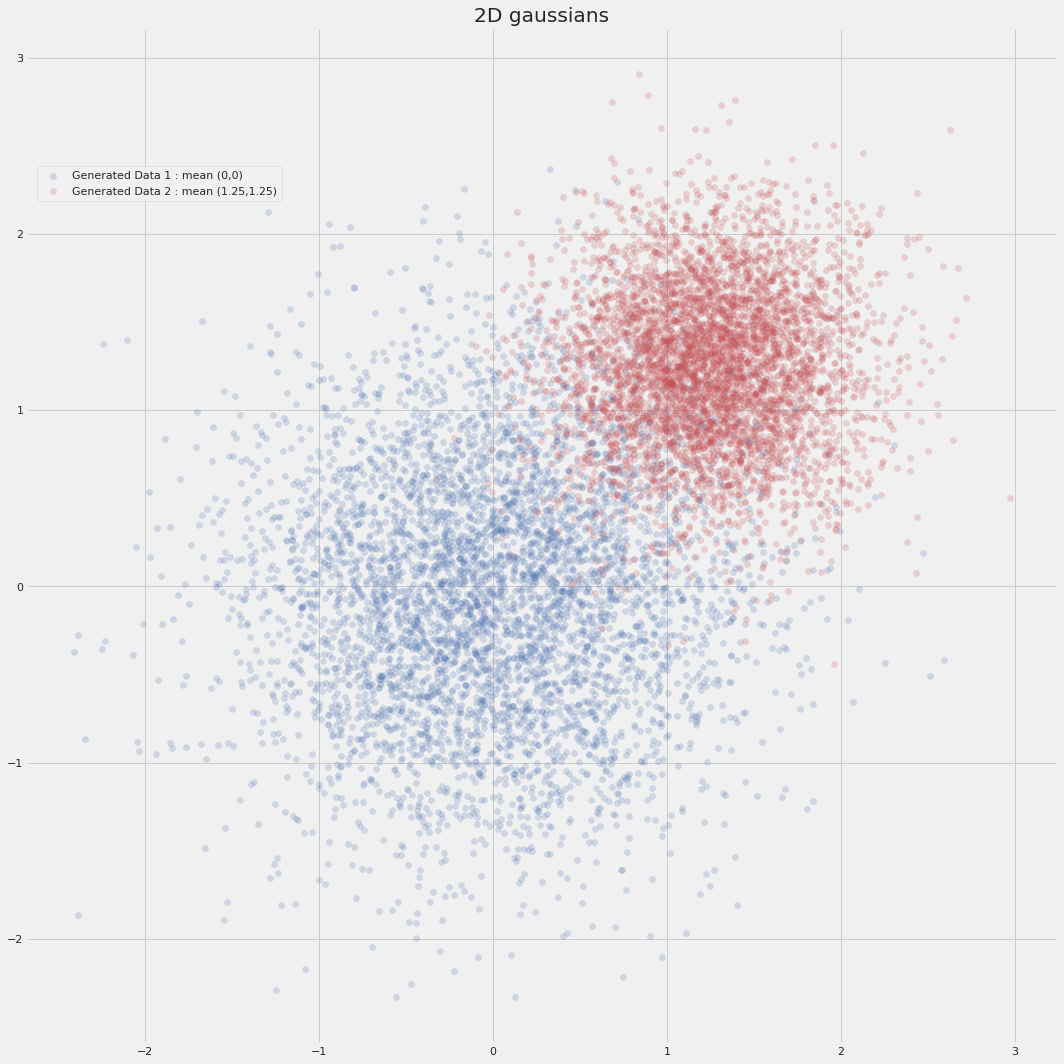

In [24]:
def data_geneartion(mean, cov, n_samples): 
  return np.random.multivariate_normal(mean, cov, (n_samples,))

# Creating two datasets
n_samples = 5000
df_1 = data_geneartion((0,0), [[0.5, 0],[0, 0.5]], n_samples)
df_2 = data_geneartion((1.25,1.25), [[0.2, 0],[0, 0.2]], n_samples)

# Creating the plot
plt.figure(figsize = (15, 15))
x=np.linspace(0,n_samples,df_1.size)

plt.scatter(x=df_1[:,0], y=df_1[:,1], marker='o', c='b', edgecolor='b', label='Generated Data 1 : mean (0,0)', alpha=0.2)
plt.scatter(x=df_2[:,0], y=df_2[:,1], marker='o', c='r', edgecolor='r',label='Generated Data 2 : mean (1.25,1.25)', alpha=0.2)

plt.legend(loc=(0.01, 0.83))
plt.title('2D gaussians')

plt.tight_layout()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

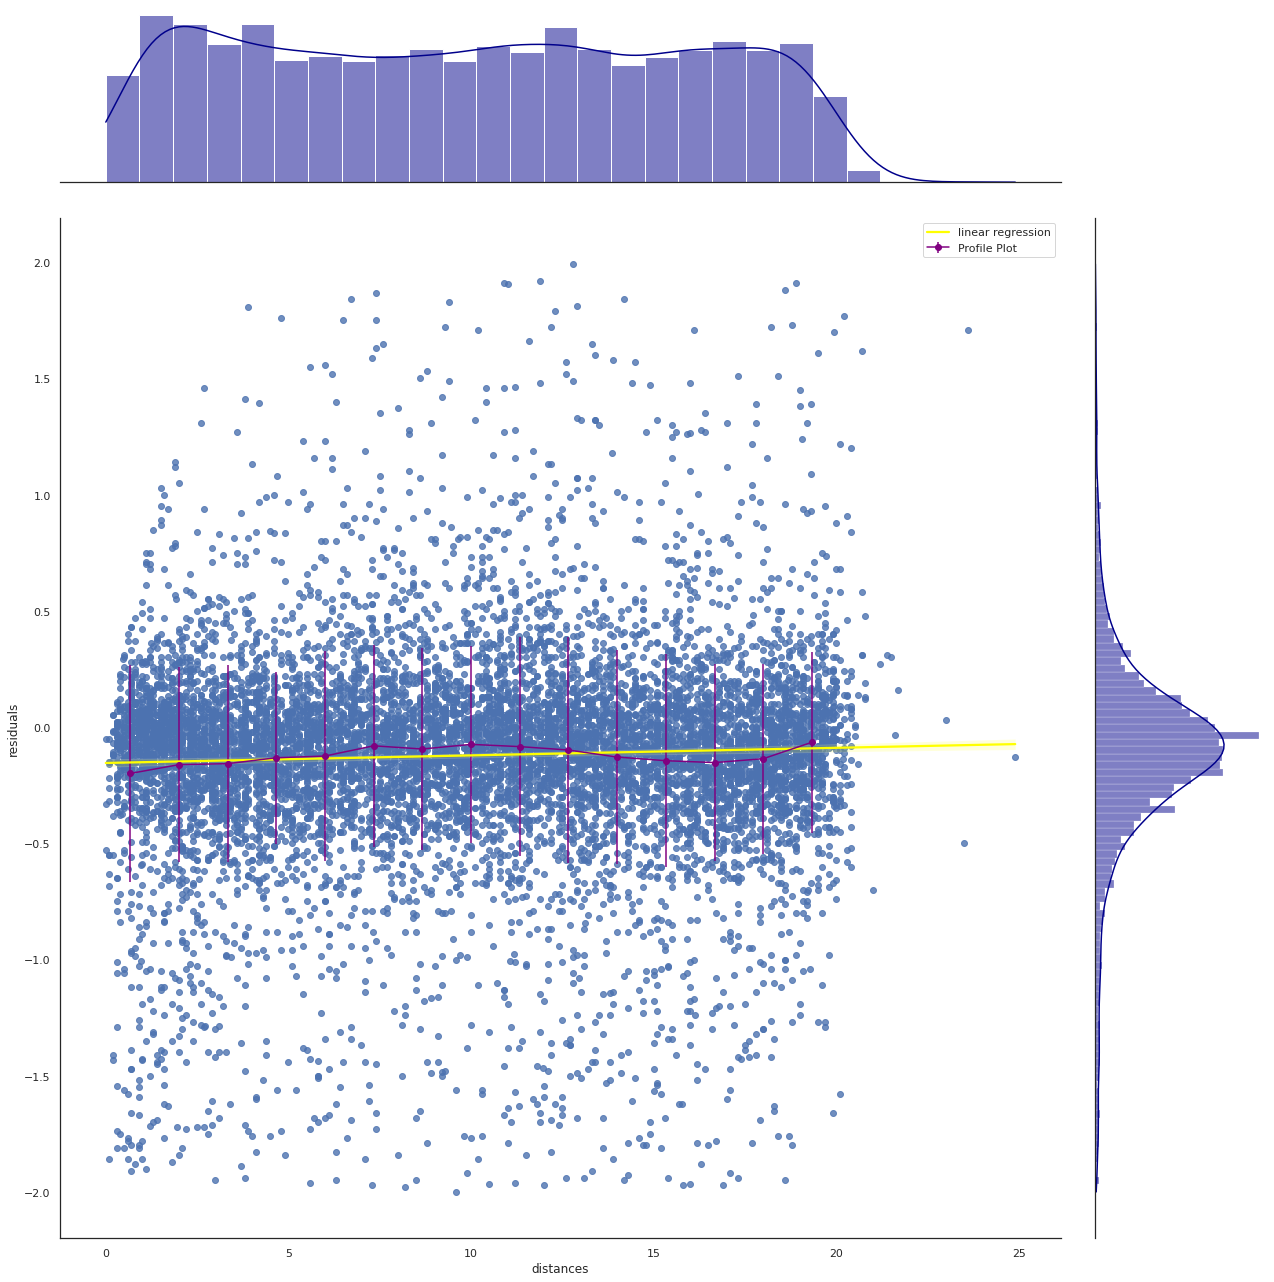

In [30]:
# Inspect the dataset, you'll find two variables (features)
temp = np.load("/content/data/residuals_261.pkl", allow_pickle=True,).item()

# Convert the content to a Pandas Dataframe
df = pd.DataFrame(temp)

# Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[abs(df['residuals'])<2]

# Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
sns.set(style='white',color_codes=True) 
g = sns.jointplot(x = df['distances'], y = df['residuals'], 
              joint_kws={'line_kws':{'color':'yellow', 'label':'linear regression'}}, 
              marginal_kws={'color':'darkblue'}, kind='reg')

# Comment on the correlation between these variable
# This 2 features residuals and distances are not correlated, becaure as we can see in the 
# joint plots, none of those features move in tandem nor they have a linear relationship with each other.
# Correlation quantifies the strength of the linear relationship between a pair of variables, whereas regression expresses 
# the relationship in the form of an equation and The regression line in the below figure is almost Horizontal which 
# mean the Slope of the line is very close to Zero, which is a strong indicator that both of these features are not correlated
g.fig.set_size_inches(20,20)
plt.sca(g.ax_joint)

# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
nbin=15
his , b= np.histogram(df['distances'],nbin,range=(0,20))

# Obtain 3 numpy arrays:
# x, the array of bin centers of the profile histogram of the "distance" variable
x=  0.5*(b[1:] + b[:-1])

# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
y=np.array([df.loc[(df['distances'] >=b[i]) & (df['distances'] <=b[i+1])]['residuals'].mean() for i in range(nbin)])

# err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y=np.array([df.loc[(df['distances'] >b[i]) & (df['distances'] <b[i+1])]['residuals'].std() for i in range(nbin)])

#Plot the profile plot on top of the scatter plot
plt.errorbar(x,y,yerr=err_y, label='Profile Plot',linewidth=1.5,color='purple',marker='o')
g.ax_joint.legend()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


<Figure size 1440x1440 with 0 Axes>

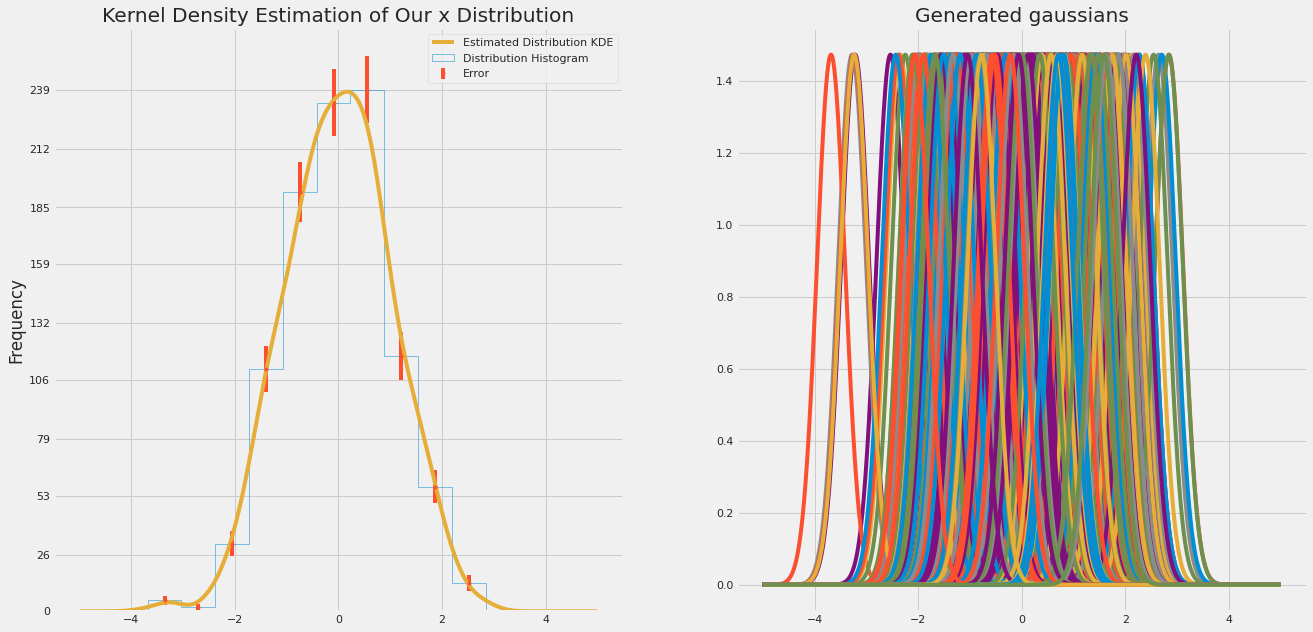

In [31]:
matplotlib.style.use('fivethirtyeight') 
# Fill a numpy array x of length N (with  N=O(100) ) with a variable normally distributed, with a given mean and standard deviation
N,mean, std= 1000, 0, 1
x= np.random.normal(loc=mean, scale=std, size=N)

# Fill an histogram in pyplot taking proper care of the aesthetic:
# use a meaningful number of bins
# set a proper y axis label
# display the histograms as data points with errors (the error being the poisson uncertainty)
plt.figure(figsize = (20, 20))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
y, var, bins = ax1.hist(x,bins=10,histtype='step',label='Distribution Histogram ')
cent = 0.5*(var[1:] + var[:-1])

ax1.errorbar(cent, y, yerr = y**0.5, marker = '.', drawstyle = 'steps-mid', ls='none', label = 'Error')
ax1.set_title('Kernel Density Estimation of Our x Distribution')
ax1.set_ylabel('Frequency')
ax1.set_yticks(ticks=np.linspace(0,y.max(),10,dtype=int))

# For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned

std_default = 1.06 * x.std() * x.size**(-1/5)
gauss = []
for i in x:
    ls = np.linspace(-5, +5, num=N)
    rv = stats.norm(i, std_default)
    gauss.append(rv.pdf(ls))
    # In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
    ax2.plot(ls, gauss[-1])
ax2.set_title('Generated gaussians')


# Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. 
# For that you could use the scipy.integrate.trapz() method. Superimpose the normalized sum of all gaussians to the first histogram.
summed = np.sum(gauss, axis=0)/N*(sp.integrate.trapz(y,x=var[1:]))
ax1.plot(ls, summed,label='Estimated Distribution KDE')
ax1.legend(markerscale=1)
